# Predicting Data Science Salaries using a Neural Network

In [2]:
pip install tensorflow|

Note: you may need to restart the kernel to use updated packages.


The syntax of the command is incorrect.


In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#read the data in
DS_salaries= pd.read_csv('ds_salaries.csv')

# Clean the Data

In [55]:
DS_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [56]:
DS_salaries.shape

(607, 12)

In [57]:
DS_salaries=DS_salaries.drop(['Unnamed: 0','salary'],axis=1)
DS_salaries.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [58]:
print(round(DS_salaries.describe(),2))
print(DS_salaries.isnull().sum())

       work_year  salary_in_usd  remote_ratio
count     607.00         607.00        607.00
mean     2021.41      112297.87         70.92
std         0.69       70957.26         40.71
min      2020.00        2859.00          0.00
25%      2021.00       62726.00         50.00
50%      2022.00      101570.00        100.00
75%      2022.00      150000.00        100.00
max      2022.00      600000.00        100.00
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


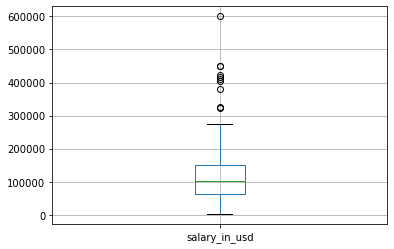

In [40]:
#Time to eliminate outliers
DS_salaries.boxplot(column='salary_in_usd')

In [62]:
from scipy import stats
DS_salaries[(np.abs(stats.zscore(DS_salaries['salary_in_usd'])) < 3)]

#After removing outliers we now have 598 observations

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [65]:
DS_salaries.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [66]:
DS_salaries['work_year'].astype(str)

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
602    2022
603    2022
604    2022
605    2022
606    2022
Name: work_year, Length: 607, dtype: object

# Feature Engineering

In [82]:
from keras.preprocessing.text import Tokenizer

DS_salaries= DS_salaries.applymap(lambda s:s.lower() if type(s) == str else s)

DS_salaries.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,mi,ft,data scientist,eur,79833,de,0,de,l
1,2020,se,ft,machine learning scientist,usd,260000,jp,0,jp,s
2,2020,se,ft,big data engineer,gbp,109024,gb,50,gb,m
3,2020,mi,ft,product data analyst,usd,20000,hn,0,hn,s
4,2020,se,ft,machine learning engineer,usd,150000,us,50,us,l


# Creating a Nueral Network using tensorflow

In [109]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

y=DS_salaries['salary_in_usd']
X=DS_salaries[['work_year','experience_level','employment_type','job_title','salary_currency', 'employee_residence','remote_ratio','company_location','company_size']]

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

input_shape = X.shape[1]

neural_model=keras.Sequential([
    layers.Dense(8, input_shape=[input_shape]),
    layers.Dense(6),
    layers.Dense(1),
])

neural_model.compile(
    optimizer="adam",
    loss="mae",
)

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = neural_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=125,
    epochs=5000,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)



Minimum validation loss: 30969.890625


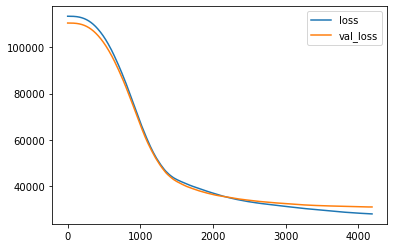

In [110]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

187